In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[1] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)

# prod_shift = 0  #0 or 1

# if prod_shift == 0:
#     prodpath_ph_res = 'phase_resolved' 
# elif prod_shift == 1:
#     prodpath_ph_res = 'phase_resolved_shift_1' 


###
Observation 90302319004 loaded successfully


# Observation 90302319004

## Phase-averaged spectra

### cutoffpl (2 gauss, one bb)

Model: constant*phabs(gaussian + gaussian + edge(cutoffpl + bbodyrad))

P#   C#   Component    Parameter  Unit    Value           Errors      
----------------------------------------------------------------------------
1    1    constant     factor             1.0                           (0.0       , 0.0       )
2    2    phabs        nH         10^22   0.8                           (0.0       , 0.0       )
3    3    gaussian     LineE      keV     6.4                           (0.0       , 0.0       )
4    3    gaussian     Sigma      keV     1.6                           (0.0       , 0.0       )
5    3    gaussian     norm               1.4                           (0.0       , 0.0       )
6    4    gaussian_4   LineE      keV     6.67                          (0.0       , 0.0       )
7    4    gaussian_4   Sigma      keV     0.05                          (0.0       , 0.0       )
8    4    gaussian_4   norm               0.03                          (0.0       , 0.0       )
9   

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319004_cutoffpl_FPMA,constant,factor,1,1.0,0.0,0.0,FFFFFFFFF,0.0,True,
1,0,90302319004_cutoffpl_FPMA,phabs,nH,2,0.8,0.0,0.0,FFFFFFFFF,0.0,True,
2,0,90302319004_cutoffpl_FPMA,gaussian,LineE,3,6.4,0.0,0.0,FFFFFFFFF,0.0,True,
3,0,90302319004_cutoffpl_FPMA,gaussian,Sigma,4,1.763523,1.751317,1.775824,FFFFFFFFF,0.011268,False,
4,0,90302319004_cutoffpl_FPMA,gaussian,norm,5,1.034032,1.007521,1.059538,FFFFFFFFF,0.023812,False,
5,0,90302319004_cutoffpl_FPMA,gaussian_4,LineE,6,6.67,0.0,0.0,FFFFFFFFF,0.0,True,
6,0,90302319004_cutoffpl_FPMA,gaussian_4,Sigma,7,0.05,0.0,0.0,FFFFFFFFF,0.0,True,
7,0,90302319004_cutoffpl_FPMA,gaussian_4,norm,8,0.013482,0.011868,0.015105,FFFFFFFFF,0.001548,False,
8,0,90302319004_cutoffpl_FPMA,edge,edgeE,9,7.1,0.0,0.0,FFFFFFFFF,0.0,True,
9,0,90302319004_cutoffpl_FPMA,edge,MaxTau,10,0.171204,0.162723,0.179666,FFFFFFFFF,0.007798,False,


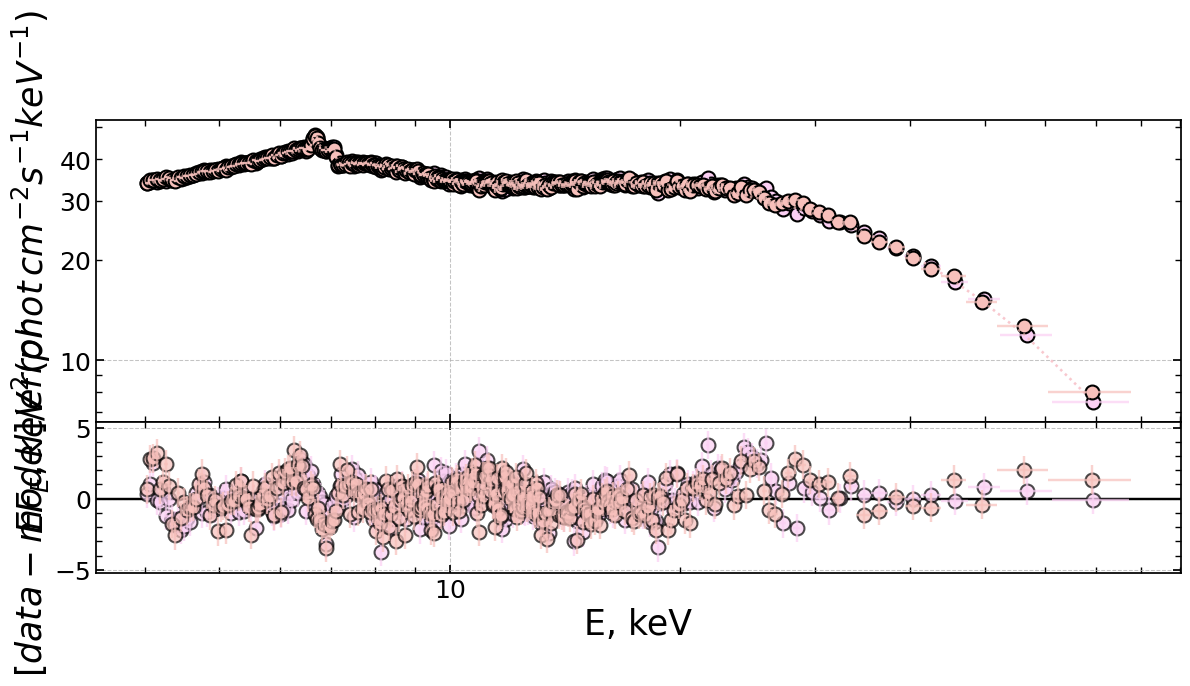

In [3]:
os.chdir(ph_ave_folder)
create_dir('xspec')


mo_cutoffpl = Model("constant*phabs*( gaussian  + gaussian +edge*(cutoffpl+bbodyrad))")
mo_cutoffpl.phabs.nH = '0.8 -1'

mo_cutoffpl.cutoffpl.PhoIndex = '1.3'
mo_cutoffpl.cutoffpl.HighECut = '20' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.cutoffpl.norm = '10'

mo_cutoffpl.bbodyrad.kT = '0.8'
mo_cutoffpl.bbodyrad.norm = '4e3' # ,, 0.1, 0.2, 3, 4'


mo_cutoffpl.gaussian.LineE = '6.4 -1'
mo_cutoffpl.gaussian.Sigma = '1.6 ' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian.norm = '1.4'

mo_cutoffpl.gaussian_4.LineE = '6.67 -1'
mo_cutoffpl.gaussian_4.Sigma = '0.05 -1' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian_4.norm = '0.03'

mo_cutoffpl.edge.edgeE = '7.1 -1 ,, 6,6.5,7.5,8' #this is like setting nh with hard and soft limits limits:  newpar 2 ,,0.3,0.3,2,2
mo_cutoffpl.edge.MaxTau = '0.1 '
#mo_cutoffpl.smedge.index = '0 -1 '
#mo_cutoffpl.smedge.width = '0.1 -1 '
showmodel(mo_cutoffpl)



model = mo_cutoffpl
model_name = 'cutoffpl'
mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors)
mo_fid_pars

## Phase-resolved spectra

### cutoffpl (2 gauss, one bb)

#### fit

In [3]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/cutoffpl/xcm/{ObsID}_cutoffpl.xcm_model')
mo_cutoffpl_loaded = AllModels(1)
mo_cutoffpl_loaded.gaussian_4.norm.frozen = True
mo_cutoffpl_loaded.gaussian.Sigma.frozen = True
#mo_cutoffpl_loaded.gsmooth.Sig_6keV.frozen = True

#showmodel(mo_cutoffpl_loaded);

##################### bin number 1 #####################
deleted xspec/cutoffpl/*90302319004_bin1_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319004_bin1_shift0_cutoffpl* files
Try loading storage xspec/cutoffpl/90302319004_bin1_shift0_cutoffpl.storage
no storage found. fitting...
 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    16     0.998111      1.00346    (-0.00266789,0.00267848)
     5     0.831694      1.02083    (-0.102003,0.0871297)
    10    0.0750738     0.108348    (-0.0164999,0.0167743)
    11      1.28032      1.36249    (-0.0419534,0.0402197)
    12      20.1003      21.7291    (-0.792587,0.836277)
    13      12.4002      14.7171    (-1.1446,1.17231)
    14     0.909485      1.02732    (-0.0554097,0.0624225)
    15      2368.21      3802.66    (-619.354,815.103)
Fit done 
 chi2 = 1368.5345505604132 for 1373 dof, chi2_red = 0.9967476697453848, H0 prob =

rm: cannot remove 'xspec/cutoffpl/*90302319004_bin7_shift0_cutoffpl*': No such file or directory


 loaded phase_resolved_bin7A_sr.pi and phase_resolved_bin7B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    16     0.990166     0.995409    (-0.0026161,0.00262638)
     5     0.934819      1.12612    (-0.100134,0.091172)
    10    0.0725176       0.1013    (-0.0141517,0.0146311)
    11       1.3524      1.42203    (-0.0352528,0.0343742)
    12      26.9221      29.3702    (-1.18156,1.26649)
    13      16.8931      19.5332    (-1.29488,1.34527)
    14     0.906459      1.02364    (-0.0569601,0.0602162)
    15      2372.31      3849.13    (-619.489,857.329)
Fit done 
 chi2 = 1545.4329666134572 for 1477 dof, chi2_red = 1.0463324079982783, H0 prob = 0.1052151805
<Storage with 2 containers>


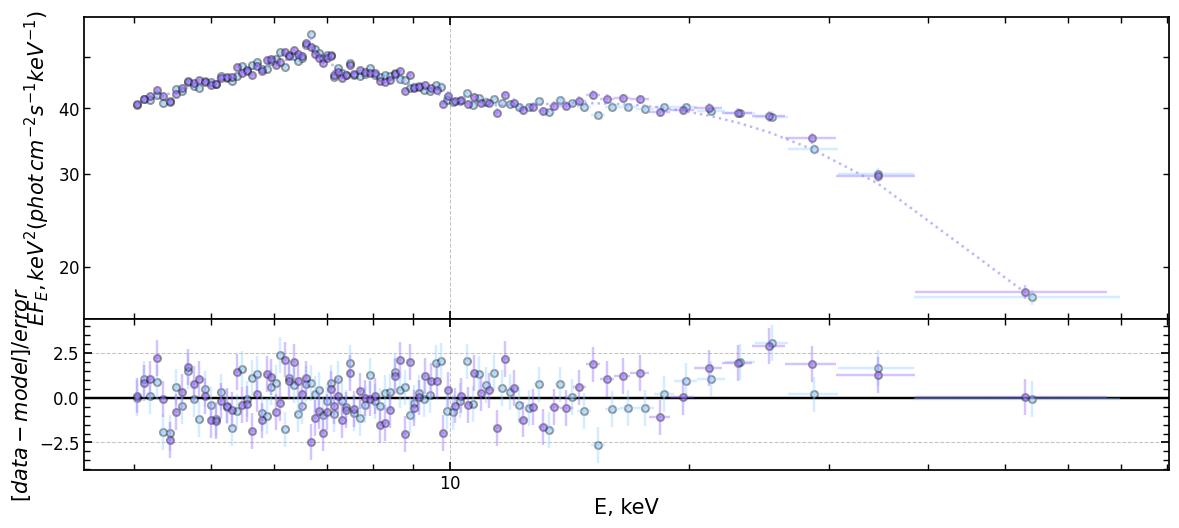

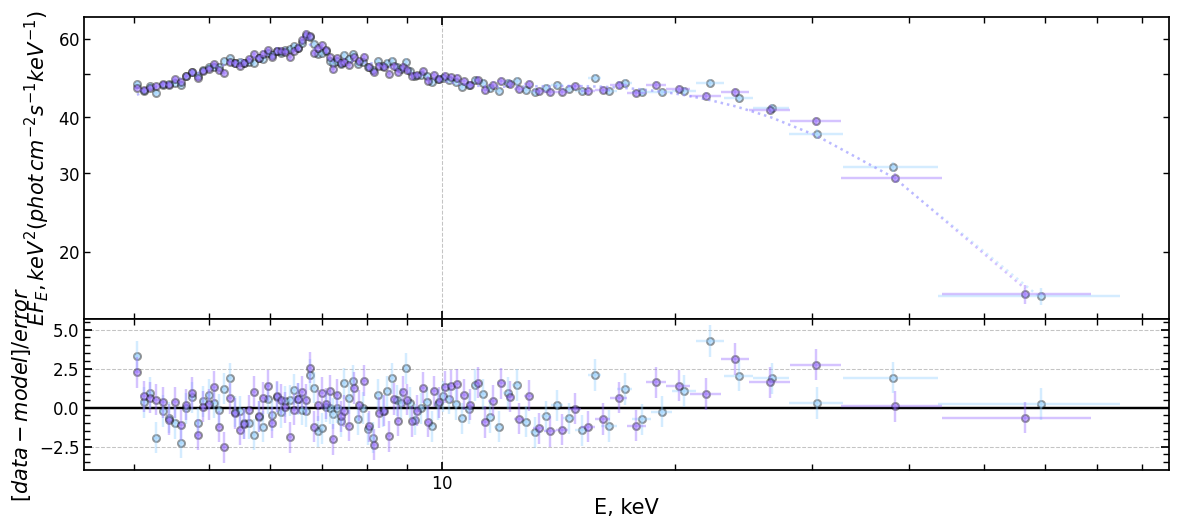

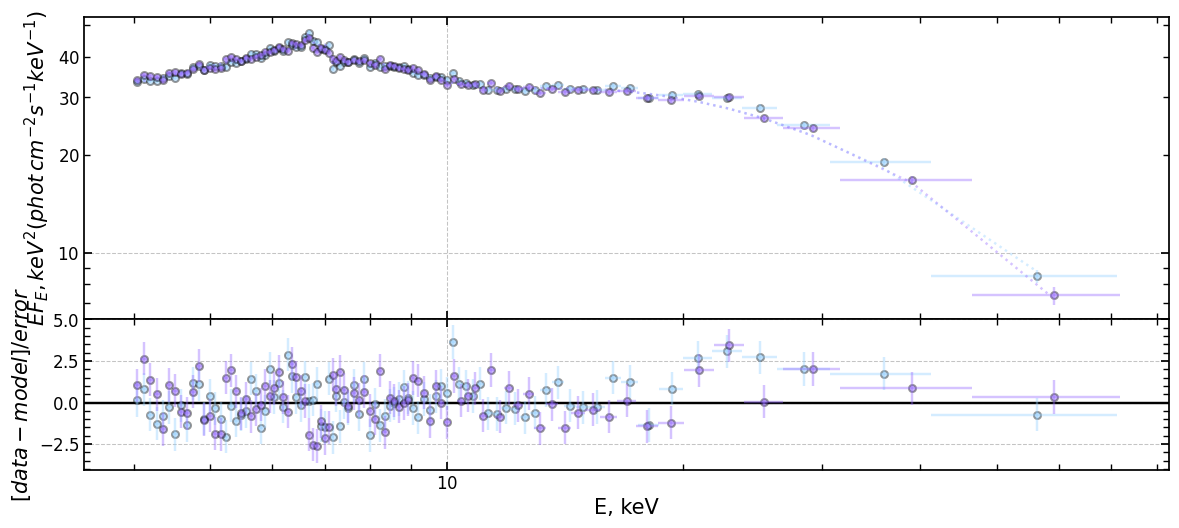

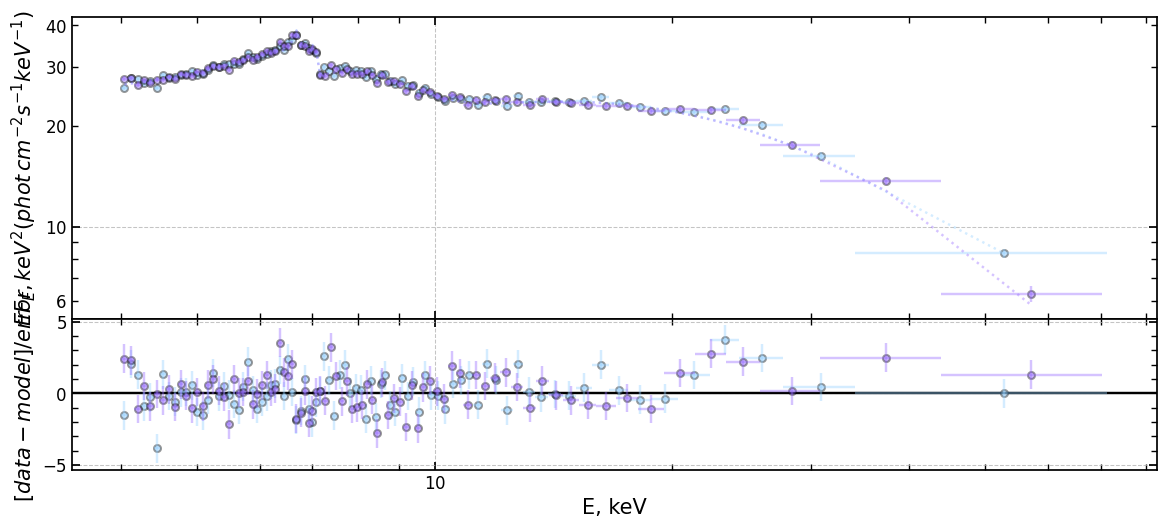

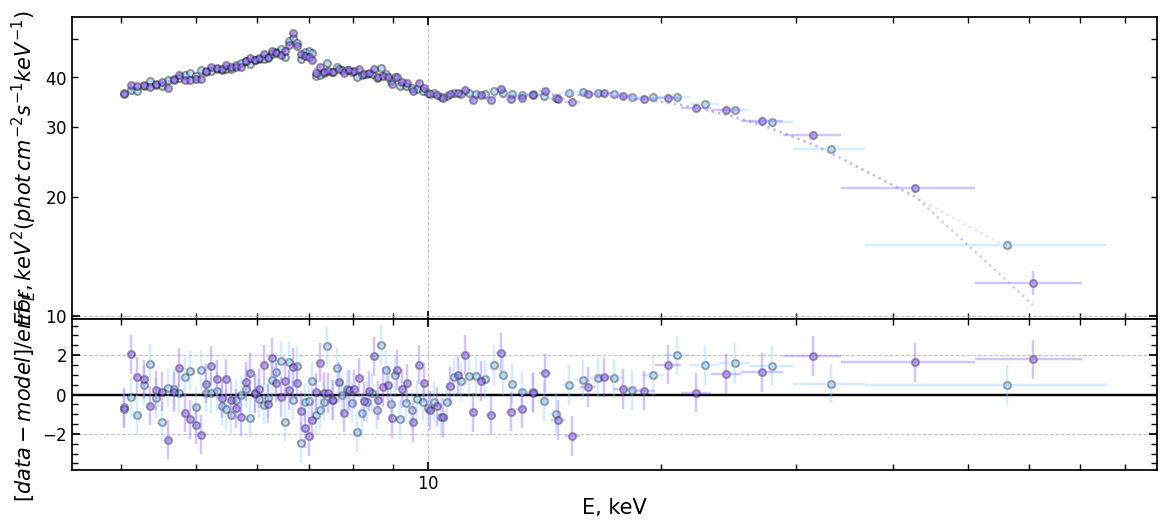

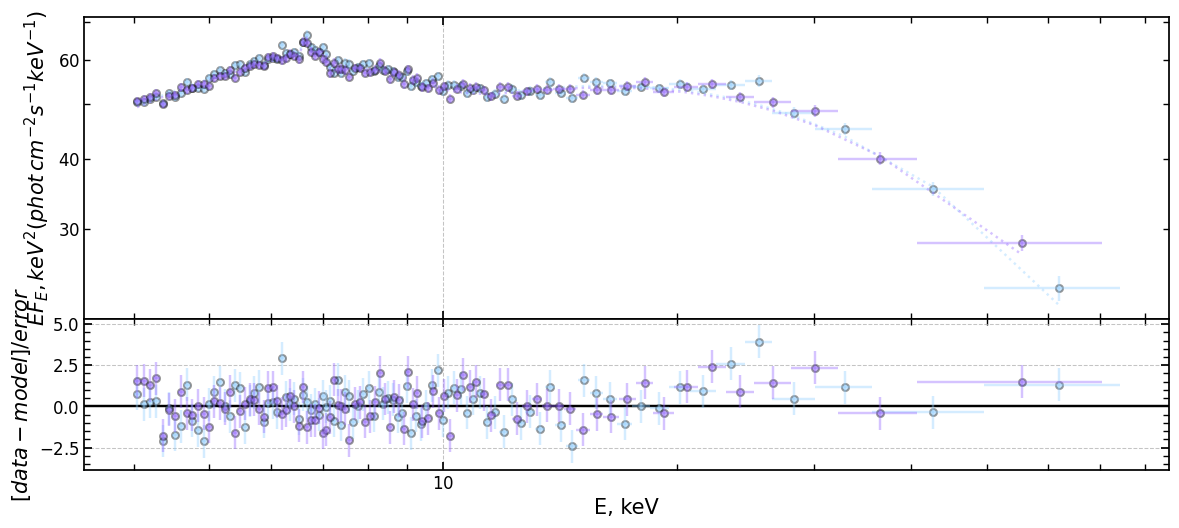

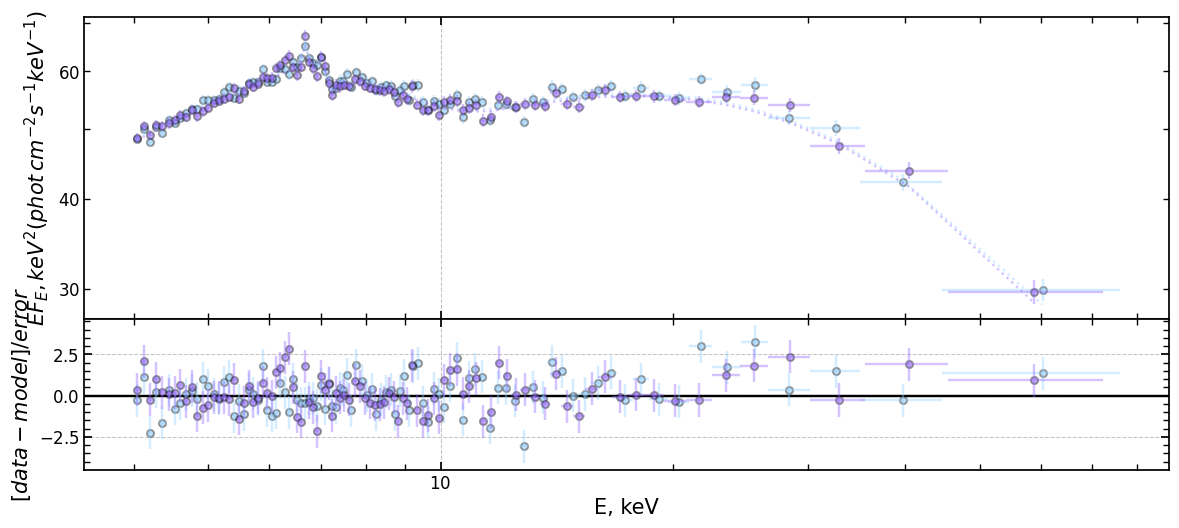

In [4]:
os.chdir(ph_res_folder)
create_dir('xspec')

model = mo_cutoffpl_loaded
model_name = 'cutoffpl'
for binnum in range(1,8):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors)


#### plot results

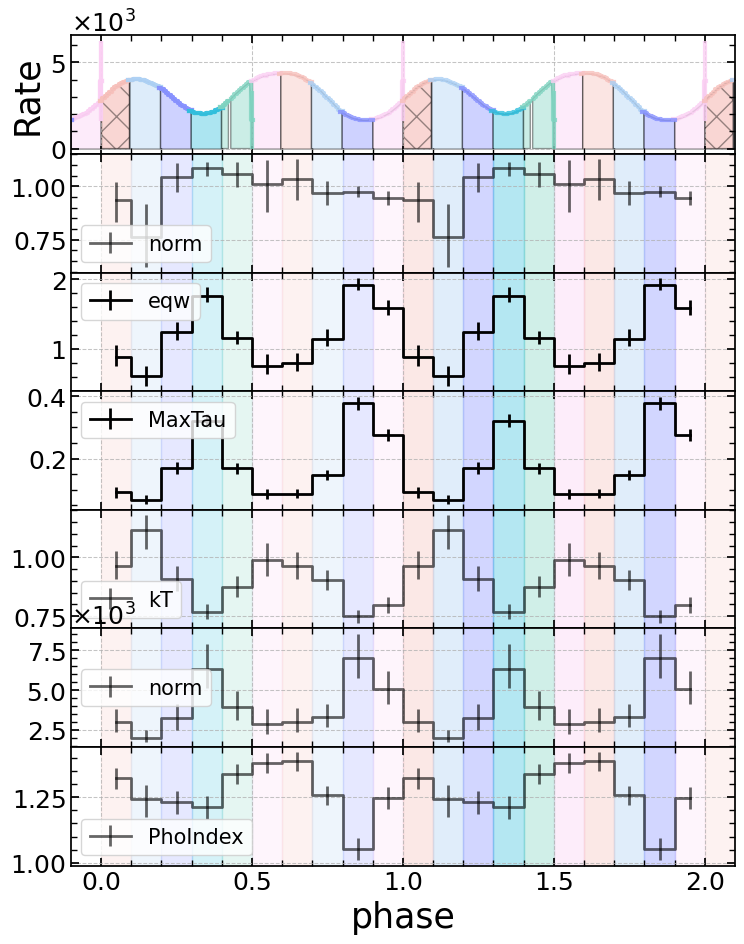

In [4]:
os.chdir(ph_res_folder)
model_name = 'cutoffpl'
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
ph_res_results_reind.head(25)



fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(7, sharex=True, figsize  = (8, 10))


efolds = glob('*.efold')
_, phase_colors = nu_obs.check_efold_of_bins(prodpath='phase_resolved', efolds_files = efolds, fiducial = None , ax_efold = ax0, fig = fig, save = False, legend=False, phase_zero_efold='phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold')



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]
ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', colors = phase_colors, lw = 2, ax = ax1)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'eqw', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 1, color = 'k',  lw = 2,  colors = phase_colors, ax = ax2)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'edge',     par =  'MaxTau', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 1, color = 'k', lw = 2, colors = phase_colors, ax = ax3)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'kT', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax4)

df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2,  colors = phase_colors, ax = ax5)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'cutoffpl',     par =  'PhoIndex', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax6)



fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
fig.savefig(f'xspec/{model_name}/ph_res_param_{model_name}.png')

### spectral ratio

['phase_resolved_bin4A_sr.pi', 'phase_resolved_bin9A_sr.pi', 'phase_resolved_bin6A_sr.pi', 'phase_resolved_bin2A_sr.pi']
fitting done
fitting done
fitting done
fitting done


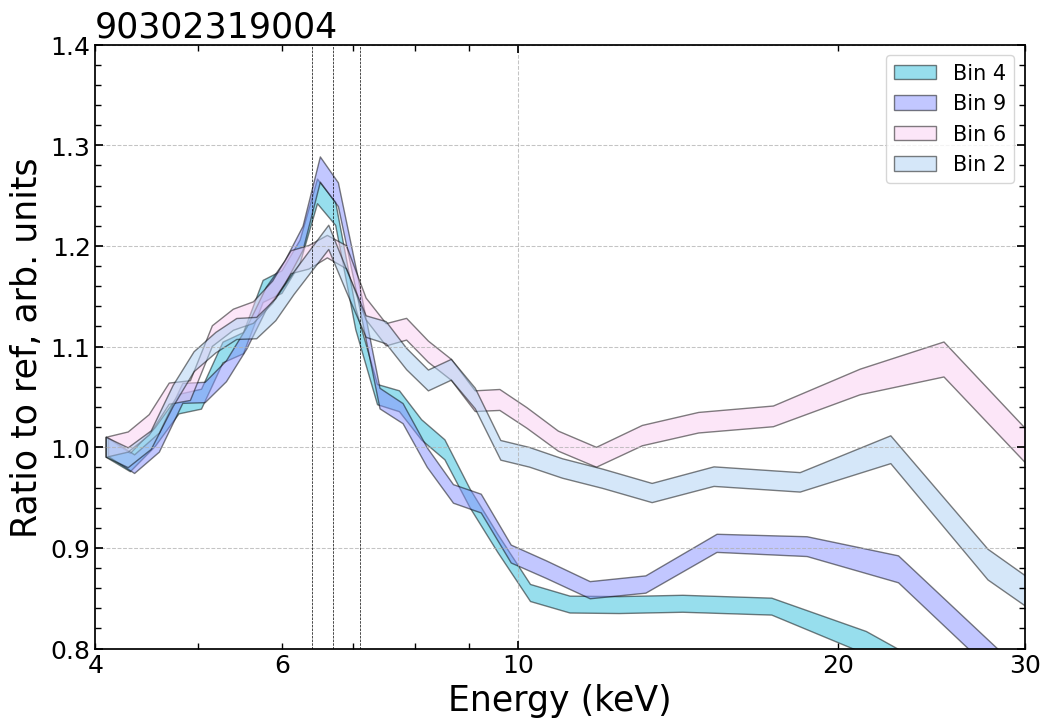

In [7]:
from python_for_nustar.nu_core import plot_spe_ratio

mo_cutoffpl = Model("cutoffpl")
mo_cutoffpl.cutoffpl.PhoIndex = '1.9 -1'
mo_cutoffpl.cutoffpl.HighECut = '100 -1' # ,, 0.1, 0.2, 3, 4'

fig = plot_spe_ratio(model = mo_cutoffpl, ph_res_folder = ph_res_folder, bins_number=[4, 9, 6, 2], zoom_rat = [0.8, 1.4], title = ObsID, min_sig=100, min_bin = 100, colors = phase_colors)